# Matematika, fizika i glazba: intervali i frekvencije

Pitagora je eksperimentirao s duljinom žice glazbenog instrumenta i otkrio da su dva tona konsonantna (ugodna za uho) ako su u omjeru "malih prirodnih brojeva". Ustanovio je da kad se žica smanji na pola, u omjeru $1:2$, visina tona se povisi za interval oktavu, kad se žica smanji u omjeru $2:3$ visina tona se povisi za interval čistu kvintu, a omjer $3:4$ daje interval čistu kvartu. 

Ton *A1* je standarni ton za ugađanje koji po dogovoru iznosi $440 Hz$.
Generiranje sinusnog tona *A1*:

In [179]:
import numpy as np
import IPython.display as ipd
sr = 22050 
T = 2.0
t = np.linspace(0,T,int(T*sr),endpoint=False)
def sinusoida(A,f,t):
    return A*np.sin(2*np.pi*f*t)
x = sinusoida(0.5,440,t)
ipd.Audio(x,rate=sr) # osnovni ton A

Tonovi *A1* i ton čija je frekvencija $2\cdot440 Hz$ zajedno čine interval oktavu:

In [180]:
y1 = sinusoida(0.5,2*440,t)
ipd.Audio([x, y1],rate=sr) # oktava

Prikaz grafova tih tonova te njihovih sjecišta na x-osi kako bi jasnije vidjeli odnos njihovih valnih duljina pa i frekvencija:

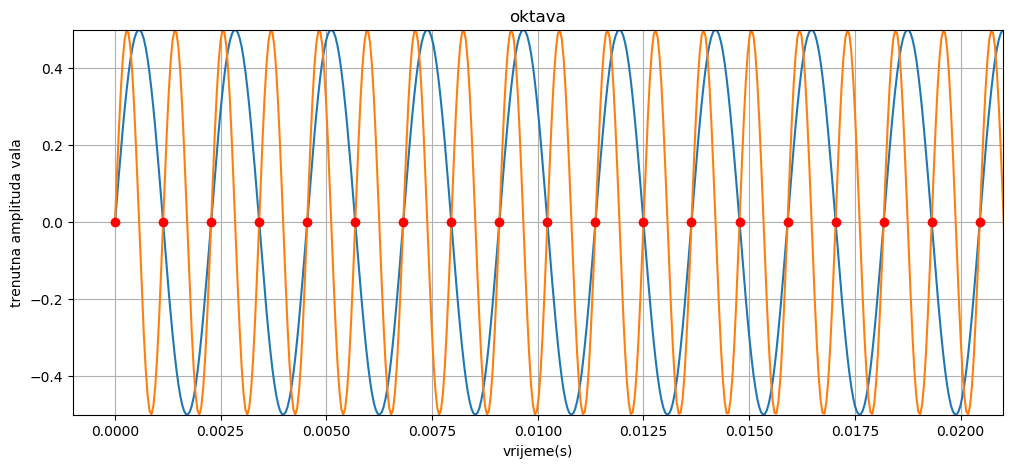

In [181]:
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def crtajsinusoide(v1,v2,s):
    plt.xlabel('vrijeme(s)')
    plt.ylabel('trenutna amplituda vala')
    plt.title(s)
    plt.grid(True)
    plt.axis([-0.001,0.021,-0.5,0.5])
    plt.plot(t,v1)
    plt.plot(t,v2)
    plt.rcParams["figure.figsize"] =(12,5)
    return

def findIntersection(fun1,fun2,frek1,frek2,x0):
    return fsolve(lambda x : fun1(0.5,frek1,x) - fun2(0.5,frek2,x),x0)

def crtajpresjek(fun1,fun2,frek1,frek2):
    x=0
    eps=10**(-10)
    for i in range(50):
        result = findIntersection(fun1,fun2,frek1,frek2,x)
        x+=1/(2*frek1)
        if(np.absolute(sinusoida(0.5,frek1,result)) < eps):
            plt.plot(result,0,'ro')
    return

crtajsinusoide(x,y1,"oktava")
crtajpresjek(sinusoida,sinusoida,440,880)

Audio i vizualni prikaz tona *A1* i tona čija je frekvencija $\frac{3}{2}\cdot440Hz$, ti tonovi čine čistu kvintu:

In [182]:
y2 = sinusoida(0.5,3/2*440,t)
ipd.Audio([x, y2],rate=sr) # čista kvinta

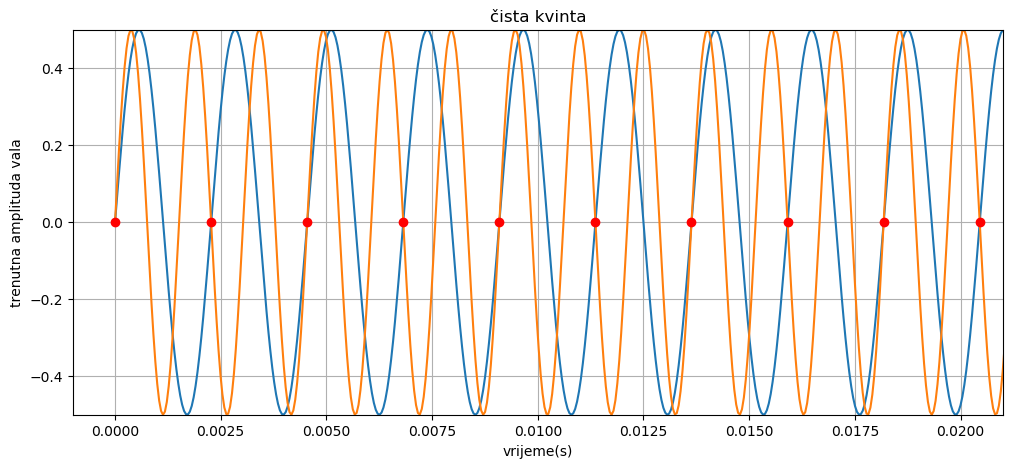

In [183]:
crtajsinusoide(x,y2,"čista kvinta")
crtajpresjek(sinusoida,sinusoida,440,3/2*440)

Audio i vizualni prikaz tona *A1* i tona čija je frekvencija $\frac{4}{3}\cdot440Hz$, ti tonovi čine čistu kvartu:

In [184]:
y3 = sinusoida(0.5,4/3*440,t)
ipd.Audio([x, y3],rate=sr) # čista kvarta

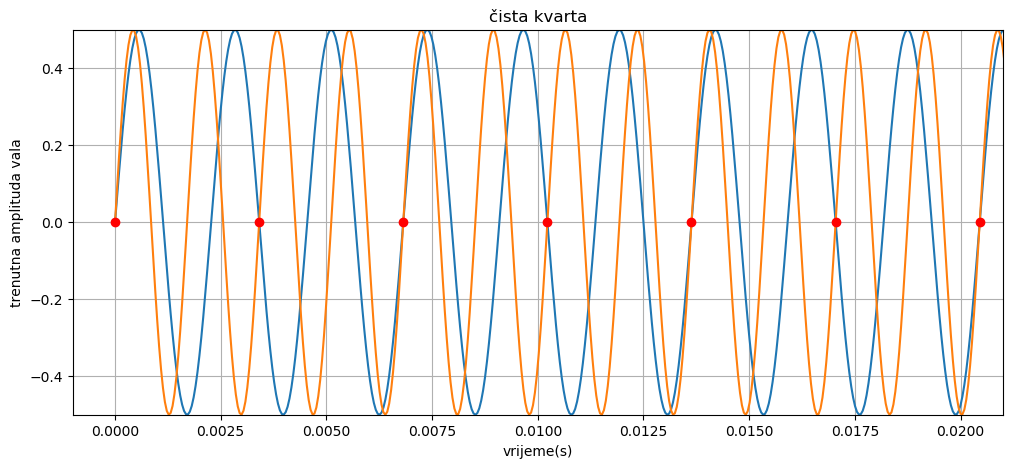

In [185]:
crtajsinusoide(x,y3,"čista kvarta")
crtajpresjek(sinusoida,sinusoida,440,4/3*440)

Audio i vizualni prikaz tona *A1* i tona čija je frekvencija $\frac{729}{512}\cdot440Hz$, ti tonovu čine povećanu kvartu koja je disnonantni (nekonsonantni) interval.

In [186]:
y4 = sinusoida(0.5,729/512*440,t)
ipd.Audio([x, y4],rate=sr) # povećana kvarta - primjer disonantnog intervala

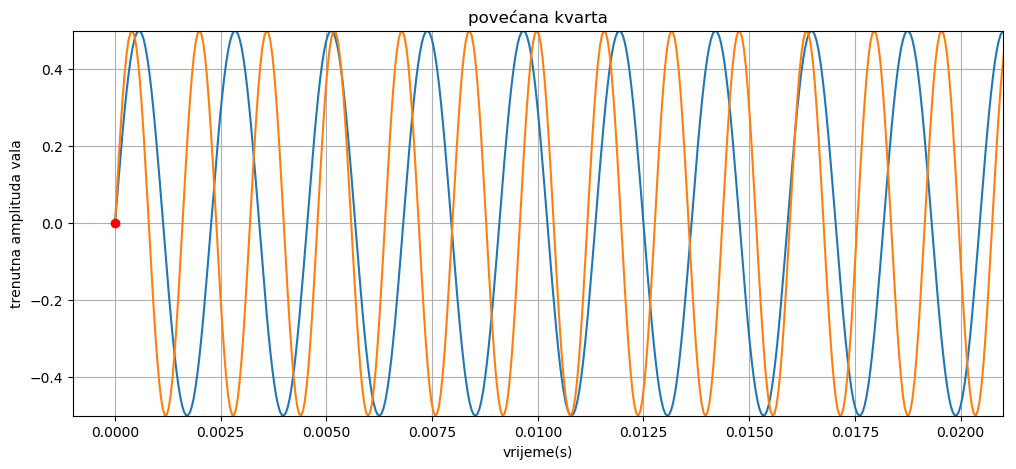

In [187]:
crtajsinusoide(x,y4,"povećana kvarta")
crtajpresjek(sinusoida,sinusoida,440,729/512*440)

Definicija glazbene ljestvice s gledišta fizike: Ljestvica je niz glazbenih tonova rastućih frekvencija zadanih omjera, pritom je ukupni raspon glazbenih tonova podijeljen u oktave.

Dur i mol ljestvice koje se koriste u klasičnoj glazbi sadrže 8 tonova, razmak između dva tona nazivaju se stepeni - mogu biti cijeli ili polustepeni. Unutar jedne oktave (npr *C1* i *C2*) je 12 polustepena.
Promotrimo *C*-dur ljestvicu na klavijaturi: *C, D, E, F, G, A, H, C*. Razmak između *C* i *D* je cijeli stepen (između njih je crna tipka), a razmak između *E* i *F* je polustepen (između nema tipke).
Promotrimo sada npr. *E*-dur ljestvicu: *E, Fis, Gis, Ais, H, Cis, Dis, E*. Ona na istim mjestima ima cijele stepene i polustepene kao *C*-dur pa i sve dur ljestvice. Mjesta na kojima su cijeli stepeni i polustepeni se razlikuju u dur i mol ljestvicama. 


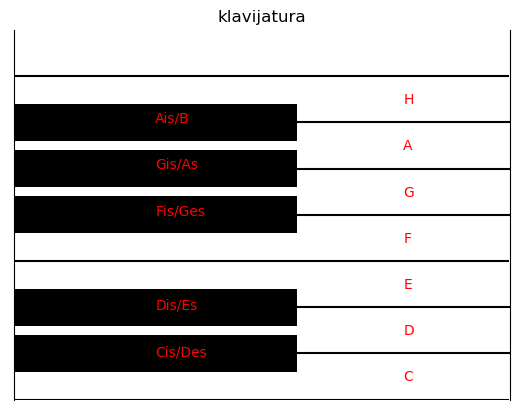

In [188]:
plt.rcdefaults()
fig, ax = plt.subplots()  # crtam klavijaturu pomoću barplota:)

y_os = np.arange(8)
x_os = [0,4,4,0,4,4,4,0]
linije = 7
tonovi1=["C","D","E","F","G","A","H"]
tonovi2=["Cis/Des","Dis/Es","Fis/Ges","Gis/As","Ais/B"]

ax.barh(y_os, x_os, xerr=linije, color='black', ecolor='black')
ax.set_title('klavijatura')
ax.set_xlim(0,7)
ax.set_ylim(0,8)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(bottom="off", left="off")
ax.set_yticklabels([])
ax.set_xticklabels([])
k=0.4
for t in tonovi1:
    ax.text(5.5,k,t,color='red')
    k+=1
k=0.95
for i in range(2):
    ax.text(2,k,tonovi2[i],color='red')
    k+=1
k=4
for i in range(2,5):
    ax.text(2,k,tonovi2[i],color='red')
    k+=1
plt.show()

Pitanje koje se postavlja je kako dobiti frekvencije svih tonova ljestvice. U 13. stoljeću francuska je akademija Notre Dame proglasila kako se do točne ljestvice može doći korištenjem samo Pitagorinih savršenih kvinti i oktava.
Svi tonovi mogu se dobiti jednostavnim matematičkim postupkom koji koristi dvije činjenice: ako osnovni ton ima frekvenciju $f$, tada kvinta gore ima frekvenciju $\frac{3}{2}\cdot f$, a oktava gore $2\cdot f$. Neka je *C* prvi ton u ljestvici i označimo njegovu frekvenciju s $f$. Tada je frekvencija tona *G* $\frac{3}{2}\cdot f$. Sljedeća kvinta je ton *D* čija je frekvencija $\frac{3}{2}\cdot\frac{3}{2}\cdot f=\frac{9}{4}\cdot f$, no prešli smo u drugu oktavu pa ga moramo spustiti: $\frac{9}{4}\cdot f:2=\frac{9}{8}\cdot f$. Sljedeća kvinta je ton *A* koji iznosi $\frac{3}{4}\cdot\frac{9}{8}\cdot f=\frac{27}{32}\cdot f$. Nastavljajući postupak možemo doći do svih 12 tonova unutar oktave. Uzet ćemo da je frekvencija tona *C* jedinična i izračunati frekvencije svih 12 tonova:

In [189]:
import pandas as pd
from fractions import Fraction as F
alphabet="CDEFGAHises/B"
tonovi = tonovi1 + tonovi2
tonovi = sorted(tonovi, key=lambda word: [alphabet.index(c) for c in word])
frek=[F(1,1)]
for i in range(11):
    frek.append(frek[i]*3/2)
    if (frek[i+1] > 2*frek[0]):
        frek[i+1] = frek[i+1] / 2
frek.append (2 * frek[0])
frek.sort()
pd.DataFrame({'Frekvencije(Hz)' : frek},index=tonovi+["C"])

,Frekvencije(Hz)
C,1
Cis/Des,2187/2048
D,9/8
Dis/Es,19683/16384
E,81/64
F,177147/131072
Fis/Ges,729/512
G,3/2
Gis/As,6561/4096
A,27/16


Ovakva ljestvica nema jednake polutonove i dobro zvuči u tonalitetu prema kojem je ugođena, no ako bismo htjeli svirati u drugom tonalitetu na ovako ugođenom klaviru, to ne bi lijepo zvučalo.
U povijesti je bilo još mnogo načina ugađanja sve dok nije standardizirano jednoliko ugađanje u kojem svi polutonovi imaju jednaku frekvenciju:
$f=440\cdot2^\frac{n}{12}$ pri čemu je $n=0$ za ton *A1* i svakom tonu pripada odgovarajući cijeli broj. U takvom ugađanju više nemamo "savršene" kvinte, ali puno je praktičnije.

Graf funkcije frekvencija i tablica frekvencija tonova u četiri oktave:

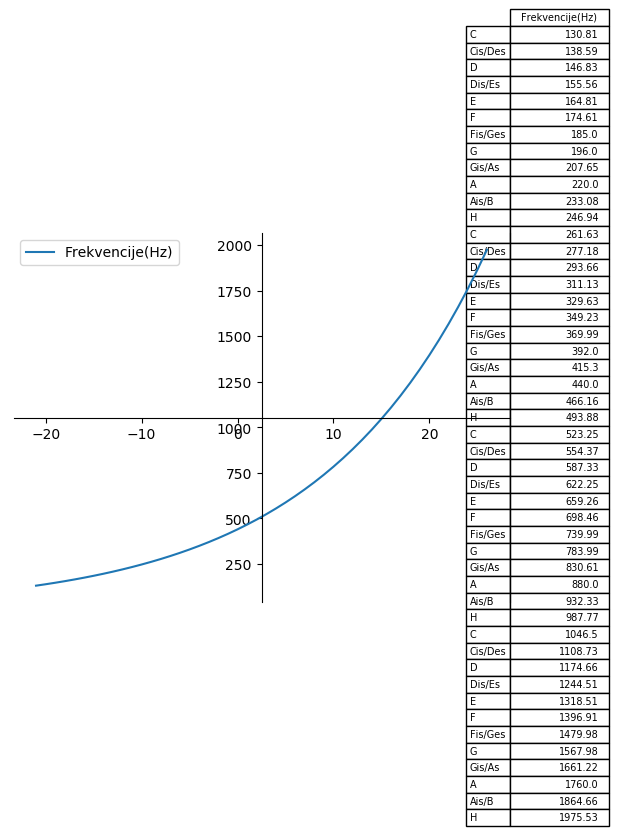

In [190]:
def frek(n):
    return 440*2**(n/12)
n=np.arange(-21, 27)
f=frek(n)
df=pd.DataFrame({'Frekvencije(Hz)' : f},index=tonovi*4)

fig, ax = plt.subplots()
pd.plotting.table(ax, np.round(df, 2), loc='right', colWidths=[0.2])
df.plot(ax=ax,x=n)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_visible(False)

Pitagorinu teoriju o konsonantnim intervalima je objasnio Galileo: konsonantost intervala čine pravilni "pulsevi" koji odgovaraju sjecištima valova prikazanih gore. No, ta teorija je kasnije opovrgnuta. 1965. Plomp i Levet su proveli eksperiment u kojem su zatražili netrenirane slušače da ocijene disonantnost intervala kreiranih od **čistih sinusnih tonova.** Pustili su jedan ton fiksne frekvencije i frekvenciju drugog tona su povećavali.
Tim eksperimentom su potvrdili teoriju koju je Helmholtz objavio gotovo stoljeće prije njih.

Pogledajmo prvo jednu od parametrizacija krivulje koju su dobili eksperimentom:
$d(f_1,f_2)=exp(-3.5\cdot s \cdot (f_2-f_1))-exp(-5.75\cdot s \cdot (f_2-f_1))$,
$s=\frac{0.24}{0.021\cdot f1+19}$ gdje su $f_1$ i $f_2$ frekvencije čistih sinusnih tonova.

[Text(0,0.5,'disonantnost'), Text(0.5,0,'omjer frekvencija')]

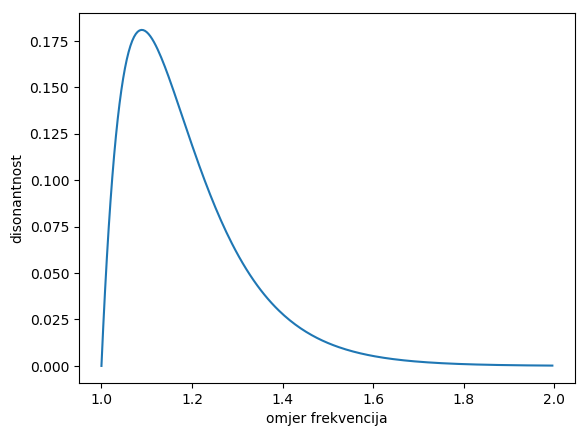

In [191]:
import numpy as np
import matplotlib.pyplot as plt
  
def plomp(f1,f2):
    fmin=min(f1,f2)
    fmax=max(f1,f2)
    s=0.24/(0.021*fmin+19.)
    return (np.exp(-3.5*s*(fmax-fmin))-np.exp(-5.75*s*(fmax-fmin)))
 
frek = np.arange(250.,500.,1.)
krivulja = np.zeros((len(frek)))
 
for i,f in enumerate(frek):
    krivulja[i] = plomp(250.,f)
    
frek=frek/250

fig, ax = plt.subplots()
plt.plot(frek,krivulja)
ax.set(xlabel="omjer frekvencija", ylabel="disonantnost")


Vidimo da je disonantnost najveća kod intervala sekunde i zatim se smanjuje prema oktavi. Razlika disonantosti kod intervala oktave i septime je minimalna, a septima se inače smatra disonatnim intervalom.
Helmholtz je to objasnio ovako: 
Kad su sinusni valovi vrlo blizu po iznosu frekvencije čuju se kao jedan ugodan ton. Malo dalje nastaju ubrzani udari koji uzrokuju disonantnost. Zatim se frekvencije udaljuju i čujemo dva tona koja nam zvuče konsonantno.


Sinusni ton u prirodi ne srećemo, možemo ga samo elektronski generirati. Zanimaju nas tzv. glazbeni tonovi koje proizvode glazbeni instrumenti. Oni su složeni i možemo ih rastaviti na jednostavnije, sinusne tonove pomoću Fourierove analize. 

In [192]:
ipd.Audio('flauta.wav') 


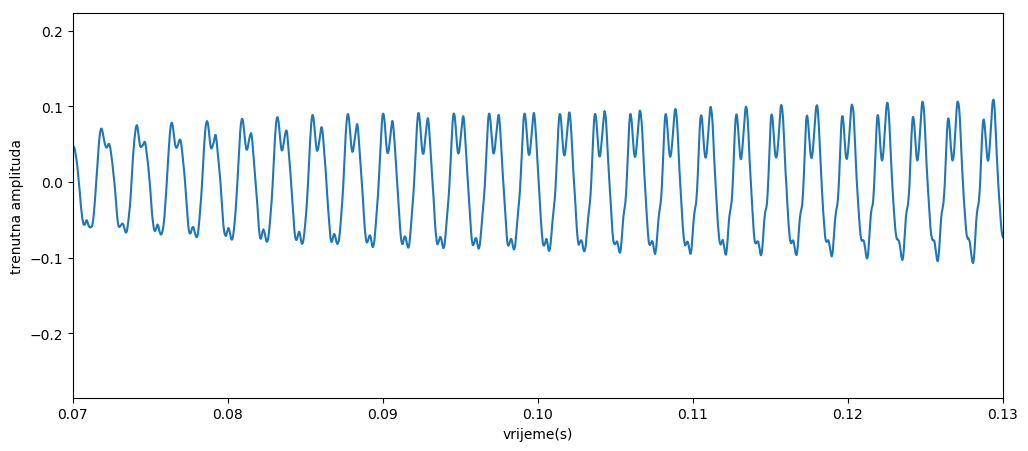

In [195]:
from scipy.io import wavfile

sr, snd = wavfile.read('flauta.wav')
snd = snd / (2.**15) ##da brojevi budu između -1 i 1
s1 = snd
t = np.arange(0, np.shape(snd)[0], 1)
t = t / sr
#print(t)
#t = t * 1000  #scale to milliseconds
plt.xlim(0.07,0.13)
plt.rcParams["figure.figsize"] =(20,5)
plt.ylabel('trenutna amplituda')
plt.xlabel('vrijeme(s)')
plt.plot(t, s1)

još alikvote, graf, objašnjenje